# Linear Regression Practical Implementation


In [16]:
import pandas as pd

In [17]:
from sklearn.datasets import fetch_california_housing


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df=fetch_california_housing()

In [20]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [21]:
dataset=pd.DataFrame(df.data)

In [22]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [23]:
dataset.columns=df.feature_names

In [24]:
## Independent and Dependent Featues
X=dataset
y=df.target

In [25]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [26]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.30, random_state=42)

In [27]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [28]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [29]:
X_train=scaler.fit_transform(X_train)

In [30]:
X_test=scaler.transform(X_test)

In [31]:
scaler.inverse_transform(X_train)

array([[   4.1312    ,   35.        ,    5.88235294, ...,    2.98529412,
          33.93      , -118.02      ],
       [   2.8631    ,   20.        ,    4.40120968, ...,    2.0141129 ,
          32.79      , -117.09      ],
       [   4.2026    ,   24.        ,    5.61754386, ...,    2.56491228,
          34.59      , -120.14      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
          37.77      , -122.42      ]])

In [32]:
from sklearn.linear_model import LinearRegression
## cross validation
from sklearn.model_selection import cross_val_score

In [33]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [34]:
np.mean(mse)

NameError: name 'np' is not defined

In [35]:
##prediction 
reg_pred=regression.predict(X_test)

In [36]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

C:\Users\sidba\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


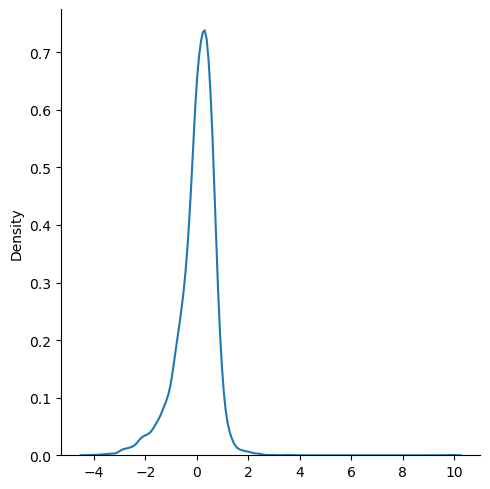

In [37]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [38]:
from sklearn.metrics import r2_score

In [39]:
score=r2_score(reg_pred,y_test)

In [40]:
score

0.34513393809439563

# Ridge Regression Algorithm

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [42]:
ridge_regressor=Ridge()

In [43]:
ridge_regressor


Ridge()

In [44]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [45]:
print(ridgecv.best_params_)


{'alpha': 5}


In [46]:
print(ridgecv.best_score_)


-0.5268179966861515


In [47]:
ridge_pred=ridgecv.predict(X_test)

C:\Users\sidba\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


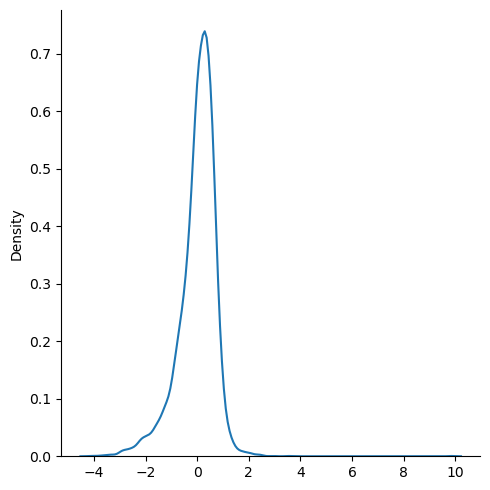

In [48]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [49]:
score=r2_score(ridge_pred,y_test)

In [50]:
score


0.3438394544140463

In [51]:
## Lasso Regression
from sklearn.linear_model import Lasso

In [52]:
lasso=Lasso()

In [53]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [54]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-1.3400019579636542


In [55]:
lasso_pred=lassocv.predict(X_test)

C:\Users\sidba\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


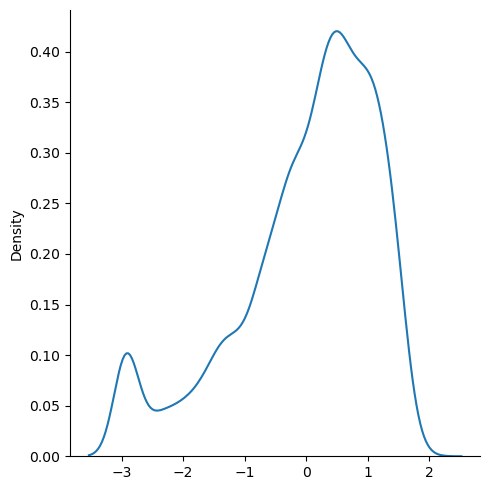

In [56]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')